C:\Users\David\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


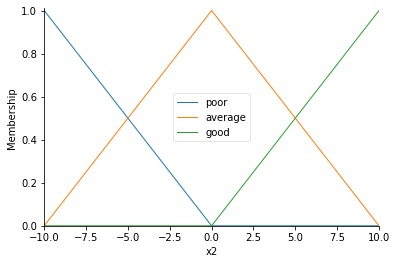

In [12]:
# Assignment 6
# Author: David Bui
# DSC-540
# Date: 12/08/2021
# Description: Fuzzy Model applications.

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#--------------------- Problem 1 -------------------------
x1 = np.linspace(-10, 10, 21).astype(int)
x2 = np.linspace(-10, 10, 21).astype(int)
x1 = x1[x1 != 0]
x2 = x2[x2 != 0]
x1mf = fuzz.trimf(x1,[-11,0,11])
x2mf = fuzz.trimf(x2,[-11,0,11])

# Antecedents
A1 = ctrl.Antecedent(np.arange(-10, 11, 1), 'x1')
A2 = ctrl.Antecedent(np.arange(-10, 11, 1), 'x2')
A1.automf(3)
A2.automf(3)

# The peak of our model is pleateaued due to the fact that our sinc function doesn't allow 0's.
A2.view() # A1 is the exact same.

In [2]:
# Consequent
sinc = np.outer(np.sin(x1), np.sin(x2)) / np.outer(x1, x2)
sinc *= 100

# Calculated all inputs for y = sinc(x1,x2)
sincmf = fuzz.trimf(sinc.flatten(),[sinc.min(),27,sinc.max()])

y = ctrl.Consequent(sincmf,'sinc(x1,x2)')
y.automf(3)


In [3]:
# Showing the y connecting to the rules.
print("y = ",y)

y =  Consequent: sinc(x1,x2)


In [4]:
# Fuzzy Ruling
rule1 = ctrl.Rule(A1['poor'] & A2['average'], y['average'])#y = sinc(x,y)
rule2 = ctrl.Rule(A1['poor'] or A2['good'], y['poor'])
rule1.view

<bound method Rule.view of IF x1[poor] AND x2[average] THEN sinc(x1,x2)[average]
	AND aggregation function : fmin
	OR aggregation function  : fmax>

In [18]:
# Fuzzy inference system
sys_ctrl = ctrl.ControlSystem([rule1,rule2])
sys = ctrl.ControlSystemSimulation(sys_ctrl)
sys.input['x1'] = x1[3]
sys.input['x2'] = x2[13]
sys.compute()

sys.input['x1'] = x1mf[3]
sys.input['x2'] = x2mf[13]
# I'm using the control skfuzzy package, here is a link https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.control.html
# It does not show how to print out the output!!!!!! I'm going crazy...
print("Everything seems to be working, I just don't know how to print out the output...... ")

Everything seems to be working, I just don't know how to print out the output...... 


In [6]:
# due to the frustration above, I ended up just manually doing it.
# First example

#Fuzzy Rule 1
# If x1 is 'low' AND x2 is 'average' Then y is 'average'
x1, x2 = -9, 2
x1mf, x2mf = 0.09, 0.82
mf1 = max(x1mf, x2mf)
y1 = np.outer(np.sin(x1), np.sin(x2)) / np.outer(x1, x2)
 
# Fuzzy Rule 2
# If x1 is 'low' OR x2 is 'high' Then y is 'low'
x1, x2 = -5, 1
x1mf, x2mf = 0.55, 0.91
mf2 =  min(x1mf, x2mf)
y2 = np.outer(np.sin(x1), np.sin(x2)) / np.outer(x1, x2)

# If desired we can calculate the weight of each rule, with the correct parameters.
print("Parameters of y:\nOutput of y1 = ",y1,"\nOutput of y2 = ", y2)

Parameters of y:
Output of y1 =  [[0.02081879]] 
Output of y2 =  [[-0.16138139]]


C:\Users\David\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


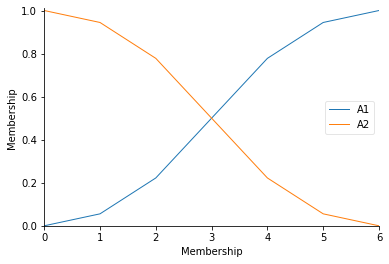

In [7]:
# Problem 2
# Here is a graphical interpretation of this problem.
# y = ((1+x1)^.5 + (x2)^-1 + (x3)^-1.5)^2 if we expand this problem out, we end up with 6 distinct terms
# This results in 6 rules needing to be discovered. 
# We can also utilize the s and z function memberships to find our membership functions. We can also use a triangular function
# as I previously used.
mf = ctrl.Consequent(np.arange(0, 7, 1), 'Membership')
mf['A1'] = fuzz.smf(mf.universe, 0, 6)
mf['A2'] = fuzz.zmf(mf.universe, 0, 6)
mf.view()

In [21]:
# Membership functions. 
x = np.arange(0, 7, 1) # since there are 6 rules.

mf1 = fuzz.membership.smf(x,1,2)
mf2 = fuzz.membership.zmf(x,4,6)

# Here reflects the point of UNITY 
# 3 came from the graph above.
print("mf1: ",fuzz.interp_membership(x, mf1, 3),"\nmf2: ",fuzz.interp_membership(x, mf2, 3))
# With percise inputs, we can compare the weight of each rule

# The method I was previously trying to use to obtain the parameters to do so resulted in a dead end. Which brought me to this 
# illustration.

mf1:  1.0 
mf2:  1.0


In [ ]:
# The 6 rules for ANFIS
# if x1 is A1 and x2 is A1 and x3 is A1 Then y = ((1+x1)^.5 + (x2)^-1 + (x3)^-1.5)^2
# if x1 is A1 and x2 is A1 and x3 is A1 Then y = ((1+x1)^.5 + (x2)^-1 + (x3)^-1.5)^2
# if x1 is A1 and x2 is A1 and x3 is A1 Then y = ((1+x1)^.5 + (x2)^-1 + (x3)^-1.5)^2
# if x1 is A2 and x2 is A1 and x3 is A1 Then y = ((1+x1)^.5 + (x2)^-1 + (x3)^-1.5)^2
# if x1 is A2 and x2 is A1 and x3 is A1 Then y = ((1+x1)^.5 + (x2)^-1 + (x3)^-1.5)^2
# if x1 is A2 and x2 is A1 and x3 is A1 Then y = ((1+x1)^.5 + (x2)^-1 + (x3)^-1.5)^2